In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
%matplotlib inline

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import utils.functions as f

# Direct Dataset

In [81]:
dataset = "direct_matching_20240213"
df_processed = pd.read_csv(f"Data/{dataset}_processed.csv", sep=";")

## Gender

In [82]:
sectors = sorted(df_processed.job_sector.unique())
protected_attribute = "cand_gender"

df_mitigation = df_processed.drop(columns=["distance_km", "match_score", "match_rank", "cand_id", "cand_education", "job_professional_category"]).copy()
columns = df_mitigation.columns
columns = columns.drop(["job_id","job_sector"])

results_df_gender = f.compute_bias_differences(df_mitigation,sectors,protected_attribute,columns)
results_df_gender.to_excel('Results/Mitigation_direct/results_df_gender_direct.xlsx', index=False)
results_df_gender

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Cinese,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco
0,0.0,0.0,184.0,11.0,0.0,185.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,106.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,585.0,128.0,0.0,50.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,223.0,180.0,0.0,85.0,3.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,953.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,484.0,159.0,0.0,180.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1721.0,1260.0,0.0,412.0,0.0,0.0,2.0,0.0,...,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
8,0.0,0.0,955.0,248.0,0.0,780.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,346.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0


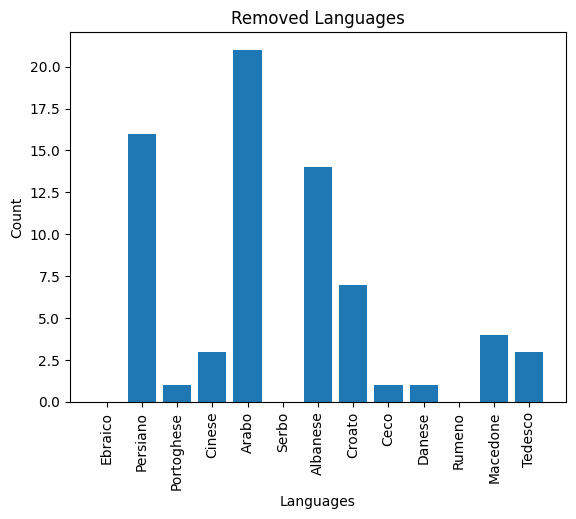

In [83]:
sums_gender = results_df_gender.iloc[:, 9:].sum()

f.plot_series(sums_gender,'Removed Languages','Languages')

In [84]:
job_df_orig_gender, job_df_repaired_gender = f.compute_repaired_df(df_mitigation,7,protected_attribute)

In [85]:
with open('utils/encodings/direct_matching_20240213_cand_domicile_region_encoding.json', 'r') as file:
    region_mapping = json.load(file)
with open('utils/encodings/direct_matching_20240213_provinces_encoding.json', 'r') as file:
    province_mapping = json.load(file)

reversed_region_mapping = {v: k for k, v in region_mapping.items()}
reversed_province_mapping = {v: k for k, v in province_mapping.items()}

job_df_orig_gender['cand_domicile_region_str'] = job_df_orig_gender['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_gender['cand_domicile_region_str'] = job_df_repaired_gender['cand_domicile_region'].map(reversed_region_mapping)

job_df_orig_gender['cand_domicile_province_str'] = job_df_orig_gender['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_gender['cand_domicile_province_str'] = job_df_repaired_gender['cand_domicile_province'].map(reversed_province_mapping)

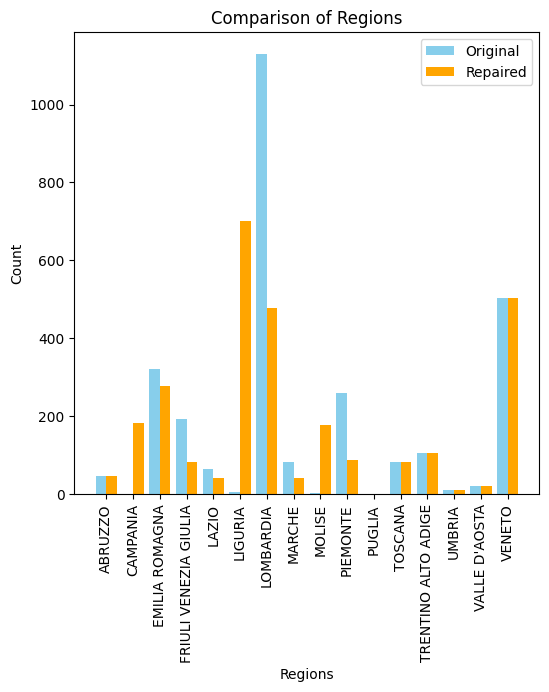

In [86]:
orig_counts = job_df_orig_gender['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_gender['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Age

In [87]:
protected_attribute_age = "cand_age_bucket"

results_df_age = f.compute_bias_differences(df_mitigation,sectors,protected_attribute_age,columns)
results_df_age.to_excel('Results/Mitigation_direct/results_df_age_direct.xlsx', index=False)
results_df_age

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Cinese,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco
0,0.0,0.0,335.0,73.0,0.0,-68.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0
1,0.0,0.0,356.0,11.0,0.0,-220.0,0.0,5.0,0.0,8.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,15.0,548.0,0.0,1986.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,17.0
3,0.0,0.0,70.0,185.0,0.0,444.0,3.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
4,0.0,0.0,402.0,856.0,0.0,404.0,2.0,0.0,0.0,0.0,...,0.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,5.0
5,0.0,0.0,253.0,440.0,0.0,850.0,0.0,0.0,0.0,0.0,...,0.0,28.0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,189.0,264.0,0.0,171.0,0.0,0.0,0.0,14.0,...,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0
7,0.0,0.0,403.0,537.0,0.0,-117.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,2.0,8.0
8,0.0,0.0,134.0,175.0,0.0,485.0,2.0,28.0,1.0,0.0,...,0.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0
9,0.0,0.0,66.0,342.0,0.0,823.0,0.0,11.0,0.0,16.0,...,0.0,1.0,0.0,0.0,4.0,0.0,0.0,43.0,0.0,3.0


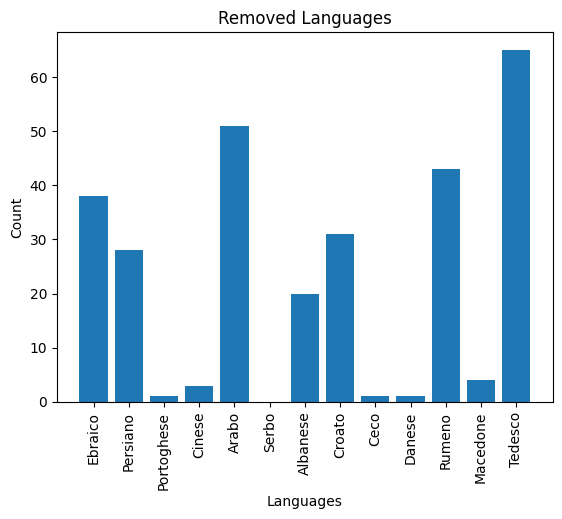

In [88]:
sums_age = results_df_age.iloc[:, 9:].sum()

f.plot_series(sums_age,'Removed Languages','Languages')

In [89]:
job_df_orig_age, job_df_repaired_age = f.compute_repaired_df(df_mitigation,2,protected_attribute_age)
job_df_orig_age['job_work_province_str'] = job_df_orig_age['job_work_province'].map(reversed_province_mapping)
job_df_repaired_age['job_work_province_str'] = job_df_repaired_age['job_work_province'].map(reversed_province_mapping)

job_df_orig_age['cand_domicile_region_str'] = job_df_orig_age['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_age['cand_domicile_region_str'] = job_df_repaired_age['cand_domicile_region'].map(reversed_region_mapping)

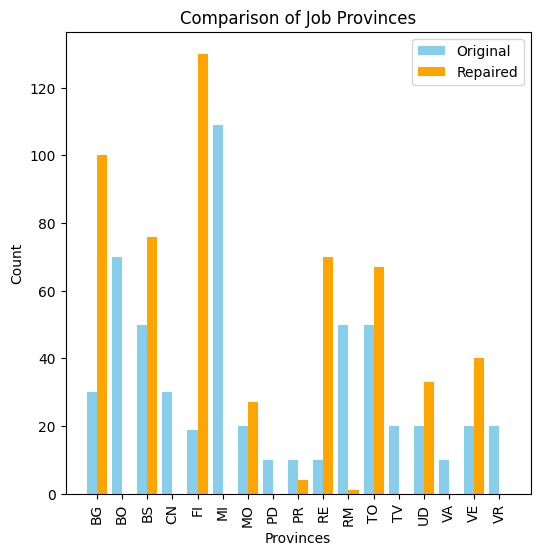

In [90]:
orig_counts = job_df_orig_age['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_age['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces')

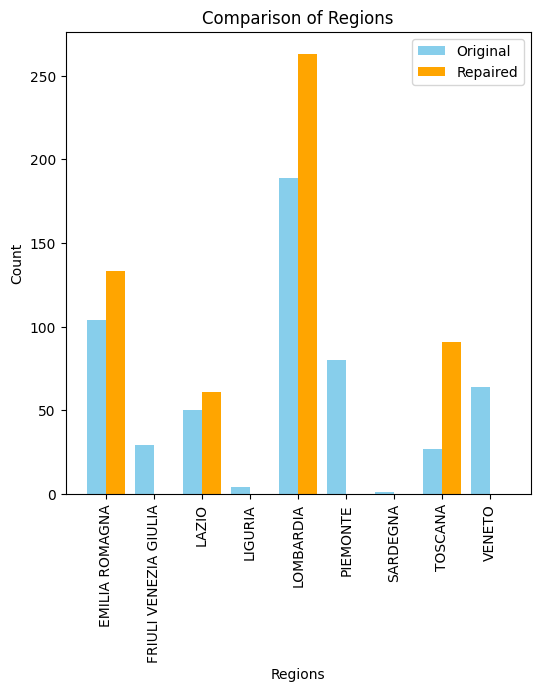

In [91]:
orig_counts = job_df_orig_age['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_age['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Location

In [92]:
protected_attribute_location = "same_location"
df_mitigation_loc = df_mitigation.dropna(subset=['job_work_province']).copy()
results_df_location = f.compute_bias_differences(df_mitigation_loc,sectors,protected_attribute_location,columns)
results_df_location.to_excel('Results/Mitigation_direct/results_df_location_direct.xlsx', index=False)
results_df_location

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Svedese,Spagnolo,Finlandese,Ebraico,...,Arabo,Serbo,Albanese,Croato,Ceco,Danese,Rumeno,Macedone,Tedesco,same_location
0,0.0,0.0,1440.0,427.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,231.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,0.0,2249.0,34.0,0.0,56.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,611.0,349.0,0.0,297.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1214.0,918.0,0.0,1149.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0
5,0.0,0.0,3772.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,510.0,305.0,0.0,360.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,2880.0,1800.0,0.0,1195.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1825.0,310.0,0.0,776.0,2.0,0.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,864.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


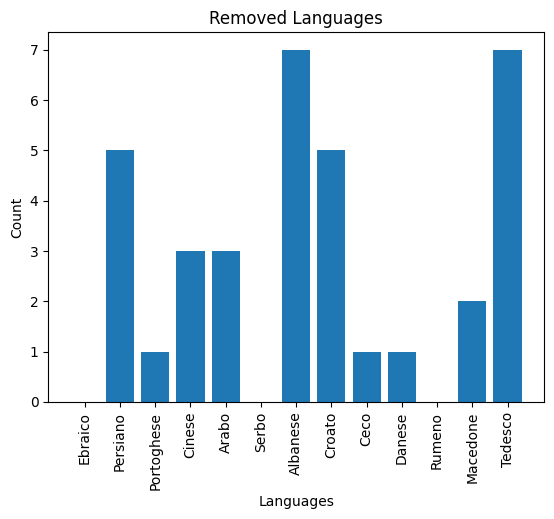

In [93]:
sums_location = results_df_location.iloc[:, 9:-1].sum()

f.plot_series(sums_location,'Removed Languages','Languages')

In [96]:
job_df_orig_location, job_df_repaired_location = f.compute_repaired_df(df_mitigation_loc,7,protected_attribute_location)
job_df_orig_location['job_work_province_str'] = job_df_orig_location['job_work_province'].map(reversed_province_mapping)
job_df_repaired_location['job_work_province_str'] = job_df_repaired_location['job_work_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_province_str'] = job_df_orig_location['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_location['cand_domicile_province_str'] = job_df_repaired_location['cand_domicile_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_region_str'] = job_df_orig_location['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_location['cand_domicile_region_str'] = job_df_repaired_location['cand_domicile_region'].map(reversed_region_mapping)

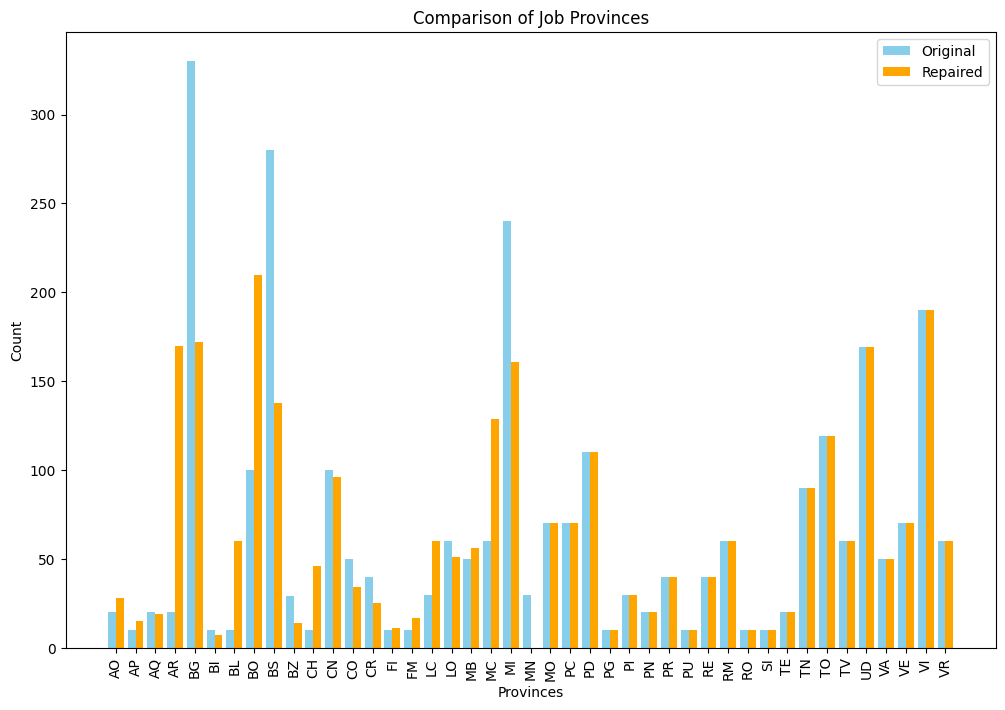

In [97]:
orig_counts = job_df_orig_location['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_location['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(12,8))

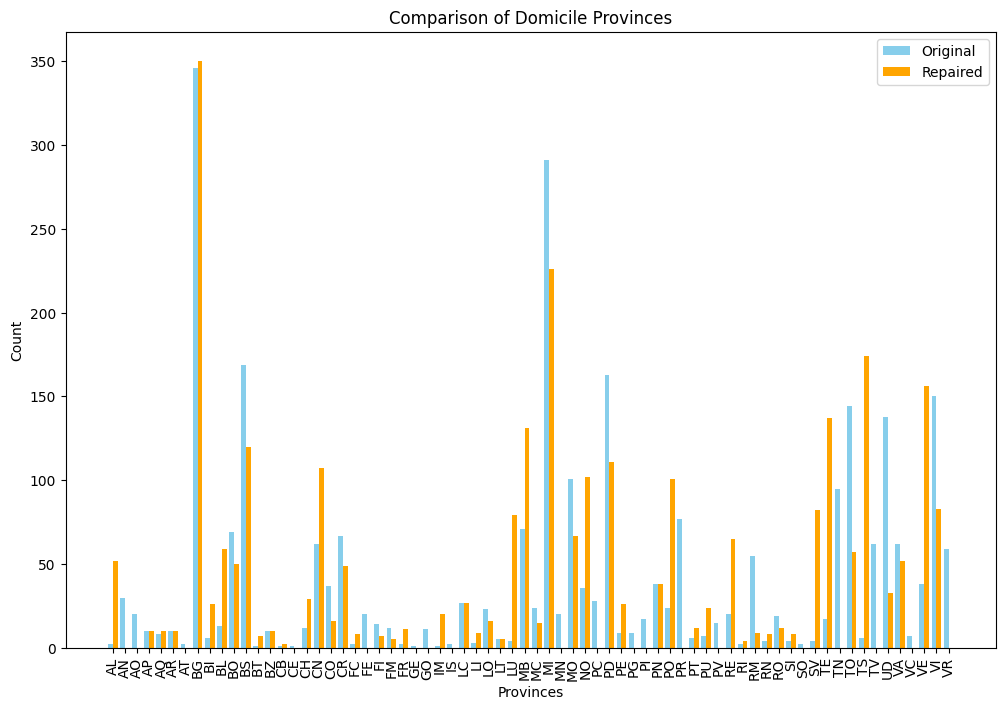

In [98]:
orig_counts = job_df_orig_location['cand_domicile_province_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Domicile Provinces','Provinces',size=(12,8))

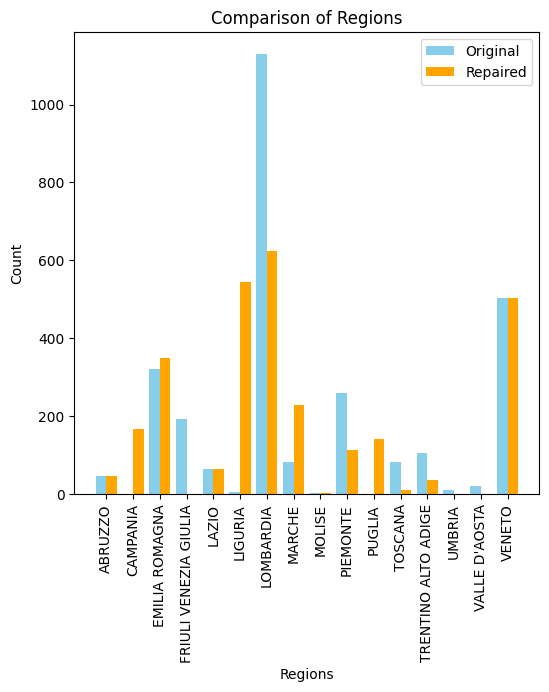

In [99]:
orig_counts = job_df_orig_location['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

# Reverse Dataset


In [100]:
dataset = "reverse_matching_20240213"
df_processed = pd.read_csv(f"Data/{dataset}_processed.csv", sep=";")
df_mitigation = df_processed.drop(columns=["distance_km", "match_score", "match_rank", "cand_id", "cand_education", "job_professional_category"]).copy()
columns = df_mitigation.columns
columns = columns.drop(["job_id","job_sector"])
sectors = sorted(df_processed.job_sector.unique())
sectors = sectors[:-1]

## Gender

In [101]:
protected_attribute = "cand_gender"

results_df_gender = f.compute_bias_differences(df_mitigation,sectors,protected_attribute,columns)
results_df_gender.to_excel('Results/Mitigation_reverse/results_df_gender_reverse.xlsx', index=False)
results_df_gender

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Spagnolo,Ebraico,Greco,Catalano,...,Italiano,Danese,Macedone,Albanese,Pakistano - Urdu,Tedesco,Sloveno,Bulgaro,Persiano,Serbo
0,0.0,0.0,9501.0,0.0,0.0,6852.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,424.0,139.0,0.0,1096.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,2835.0,781.0,3.0,1379.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,8393.0,0.0,0.0,4460.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,3281.0,0.0,0.0,11339.0,0.0,0.0,4.0,0.0,...,0.0,5.0,0.0,0.0,16.0,0.0,1.0,13.0,0.0,0.0
5,0.0,0.0,914.0,154.0,3.0,2527.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6,0.0,0.0,1463.0,361.0,0.0,3986.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,7216.0,0.0,0.0,3925.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,10188.0,7563.0,0.0,4160.0,0.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,16687.0,0.0,0.0,19652.0,0.0,0.0,1.0,7.0,...,0.0,5.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0


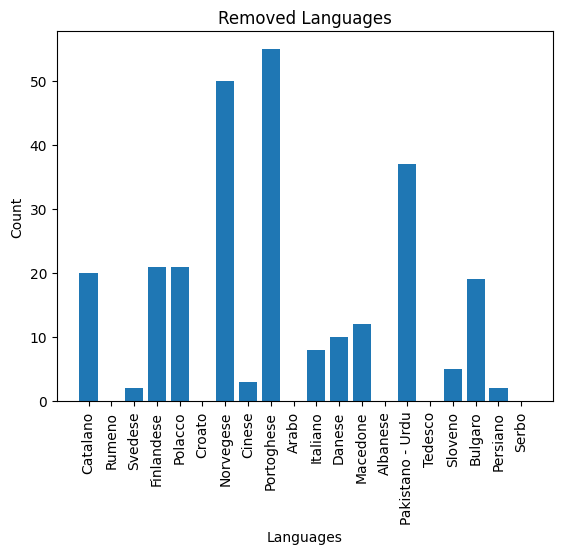

In [102]:
sums_gender = results_df_gender.iloc[:, 9:].sum()

f.plot_series(sums_gender,'Removed Languages','Languages')

In [103]:
job_df_orig_gender, job_df_repaired_gender = f.compute_repaired_df(df_mitigation,8,protected_attribute)

In [104]:
with open('utils/encodings/reverse_matching_20240213_cand_domicile_region_encoding.json', 'r') as file:
    region_mapping = json.load(file)
with open('utils/encodings/reverse_matching_20240213_provinces_encoding.json', 'r') as file:
    province_mapping = json.load(file)

reversed_region_mapping = {v: k for k, v in region_mapping.items()}
reversed_province_mapping = {v: k for k, v in province_mapping.items()}

job_df_orig_gender['cand_domicile_region_str'] = job_df_orig_gender['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_gender['cand_domicile_region_str'] = job_df_repaired_gender['cand_domicile_region'].map(reversed_region_mapping)

job_df_orig_gender['cand_domicile_province_str'] = job_df_orig_gender['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_gender['cand_domicile_province_str'] = job_df_repaired_gender['cand_domicile_province'].map(reversed_province_mapping)

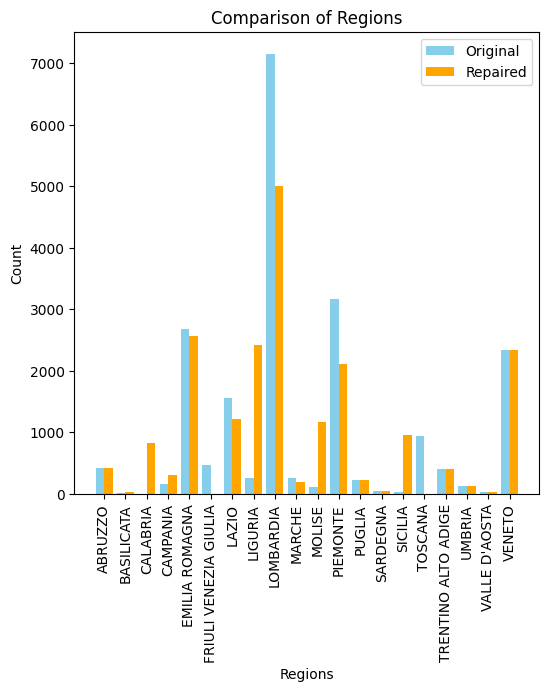

In [105]:
orig_counts = job_df_orig_gender['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_gender['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Age

In [106]:
protected_attribute_age = "cand_age_bucket"

results_df_age = f.compute_bias_differences(df_mitigation,sectors,protected_attribute_age,columns)
results_df_age.to_excel('Results/Mitigation_reverse/results_df_age_reverse.xlsx', index=False)
results_df_age

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Spagnolo,Ebraico,Greco,Catalano,...,Italiano,Danese,Macedone,Albanese,Pakistano - Urdu,Tedesco,Sloveno,Bulgaro,Persiano,Serbo
0,0.0,0.0,1843.0,1835.0,0.0,-911.0,0.0,0.0,0.0,2.0,...,14.0,0.0,15.0,0.0,5.0,0.0,0.0,15.0,0.0,0.0
1,0.0,0.0,46.0,706.0,0.0,580.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,957.0,1518.0,3.0,-192.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,14.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,359.0,3082.0,13.0,2767.0,0.0,0.0,0.0,5.0,...,13.0,0.0,4.0,48.0,3.0,0.0,0.0,1.0,91.0,0.0
4,0.0,0.0,2829.0,2769.0,0.0,-3157.0,0.0,0.0,4.0,10.0,...,10.0,5.0,28.0,31.0,16.0,0.0,1.0,13.0,188.0,0.0
5,0.0,0.0,-890.0,290.0,3.0,874.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,7.0,0.0
6,0.0,0.0,490.0,246.0,10.0,-998.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
7,0.0,0.0,-539.0,-3242.0,3.0,12061.0,0.0,0.0,8.0,6.0,...,8.0,0.0,19.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
8,0.0,0.0,9028.0,-10716.0,0.0,1.0,0.0,0.0,2.0,5.0,...,6.0,0.0,4.0,0.0,0.0,0.0,1.0,26.0,0.0,0.0
9,0.0,0.0,230.0,2383.0,0.0,2710.0,0.0,0.0,1.0,7.0,...,29.0,5.0,4.0,0.0,10.0,0.0,1.0,7.0,0.0,0.0


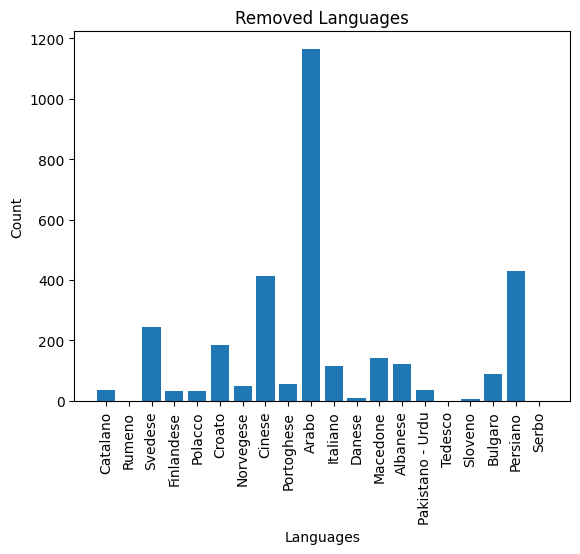

In [107]:
sums_age = results_df_age.iloc[:, 9:].sum()

f.plot_series(sums_age,'Removed Languages','Languages')

In [108]:
job_df_orig_age, job_df_repaired_age = f.compute_repaired_df(df_mitigation,11,protected_attribute_age)
job_df_orig_age['job_work_province_str'] = job_df_orig_age['job_work_province'].map(reversed_province_mapping)
job_df_repaired_age['job_work_province_str'] = job_df_repaired_age['job_work_province'].map(reversed_province_mapping)

job_df_orig_age['cand_domicile_region_str'] = job_df_orig_age['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_age['cand_domicile_region_str'] = job_df_repaired_age['cand_domicile_region'].map(reversed_region_mapping)

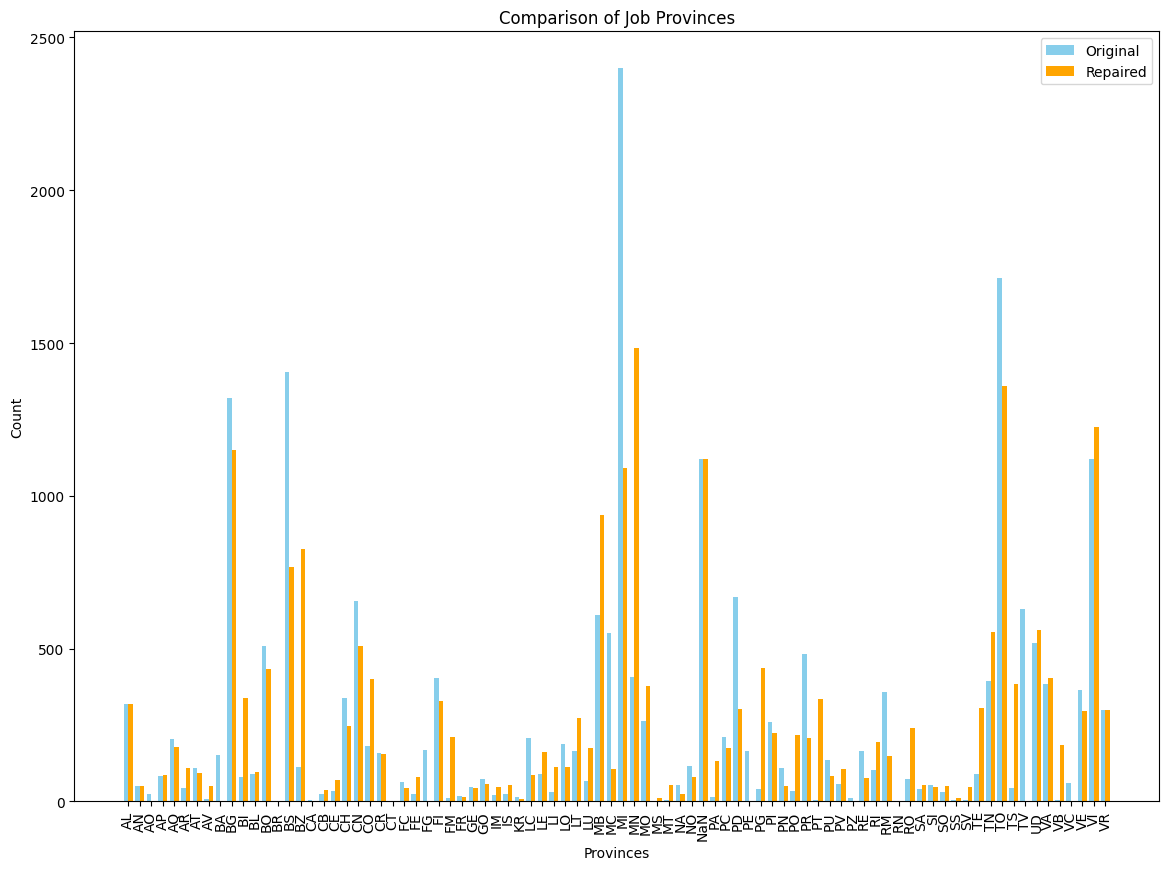

In [109]:
orig_counts = job_df_orig_age['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_age['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(14,10))

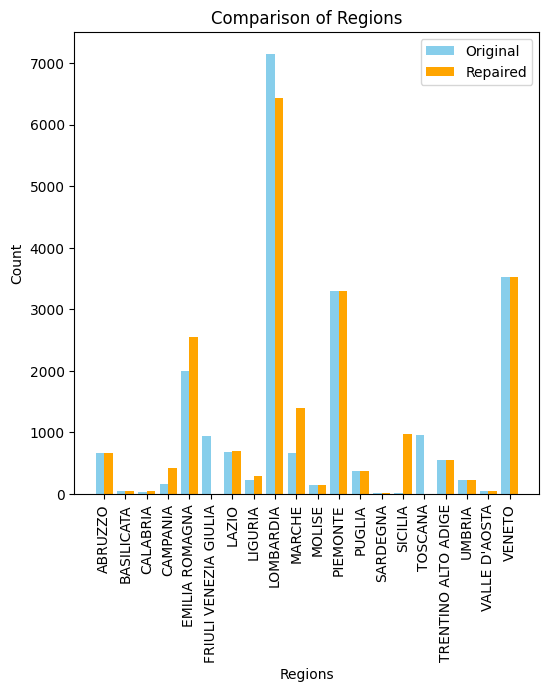

In [110]:
orig_counts = job_df_orig_age['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_age['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')

## Location

In [111]:
protected_attribute_location = "same_location"
df_mitigation_loc = df_mitigation.dropna(subset=['job_work_province']).copy()
results_df_location = f.compute_bias_differences(df_mitigation_loc,sectors,protected_attribute_location,columns)
results_df_location.to_excel('Results/Mitigation_reverse/results_df_location_reverse.xlsx', index=False)
results_df_location

/content/utils/functions.py:788: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, differences_df], ignore_index=True)


,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,job_contract_type,job_work_province,Spagnolo,Ebraico,Greco,Catalano,...,Danese,Macedone,Albanese,Pakistano - Urdu,Tedesco,Sloveno,Bulgaro,Persiano,Serbo,same_location
0,0.0,0.0,17048.0,3245.0,0.0,25498.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1159.0,705.0,0.0,3212.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,5713.0,2177.0,0.0,6671.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,12142.0,0.0,0.0,17815.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,9573.0,0.0,0.0,18356.0,0.0,0.0,4.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1601.0,789.0,0.0,2695.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
6,0.0,0.0,1483.0,222.0,0.0,2229.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,15461.0,4450.0,3.0,23152.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,12415.0,9536.0,0.0,6785.0,0.0,0.0,2.0,5.0,...,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,35878.0,48.0,0.0,36946.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


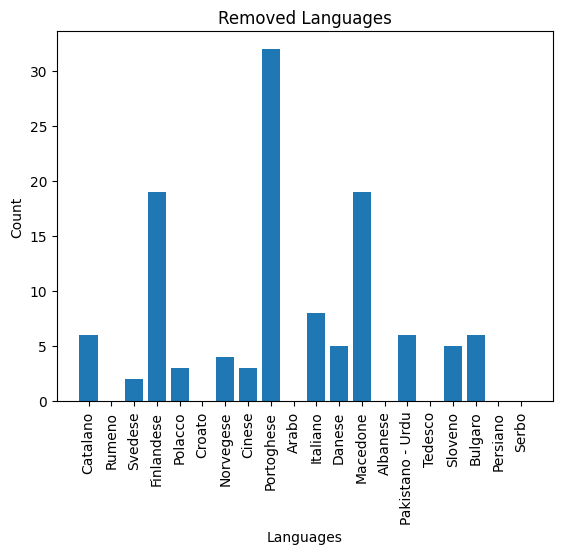

In [112]:
sums_location = results_df_location.iloc[:, 9:-1].sum()

f.plot_series(sums_location,'Removed Languages','Languages')

In [114]:
job_df_orig_location, job_df_repaired_location = f.compute_repaired_df(df_mitigation_loc,7,protected_attribute_location)
job_df_orig_location['job_work_province_str'] = job_df_orig_location['job_work_province'].map(reversed_province_mapping)
job_df_repaired_location['job_work_province_str'] = job_df_repaired_location['job_work_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_province_str'] = job_df_orig_location['cand_domicile_province'].map(reversed_province_mapping)
job_df_repaired_location['cand_domicile_province_str'] = job_df_repaired_location['cand_domicile_province'].map(reversed_province_mapping)

job_df_orig_location['cand_domicile_region_str'] = job_df_orig_location['cand_domicile_region'].map(reversed_region_mapping)
job_df_repaired_location['cand_domicile_region_str'] = job_df_repaired_location['cand_domicile_region'].map(reversed_region_mapping)

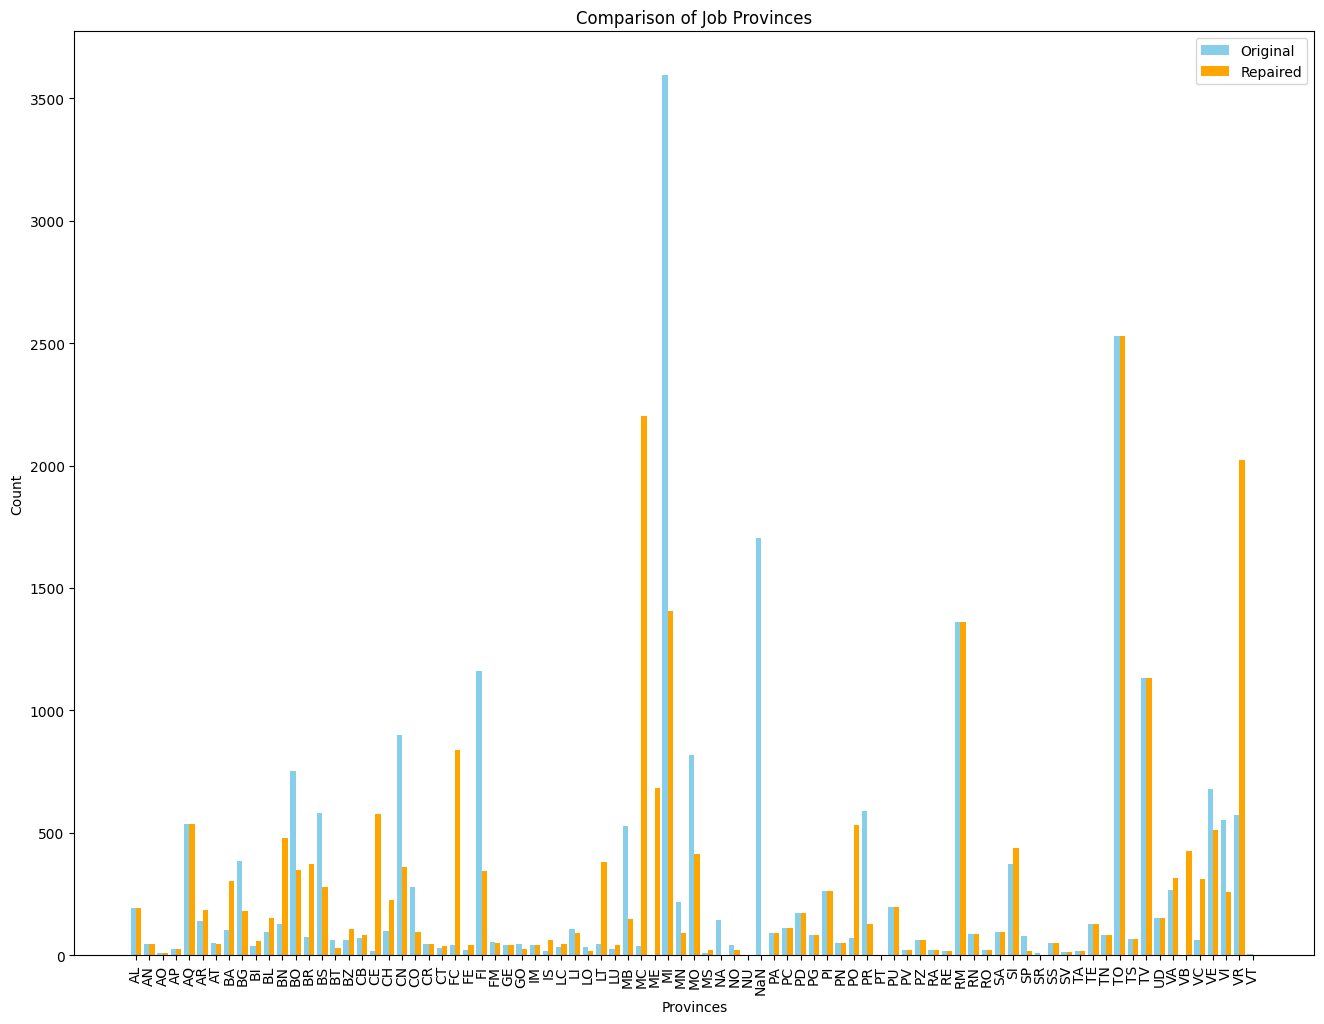

In [115]:
orig_counts = job_df_orig_location['job_work_province_str'].value_counts()
repaired_counts = job_df_repaired_location['job_work_province_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Job Provinces','Provinces',size=(16,12))

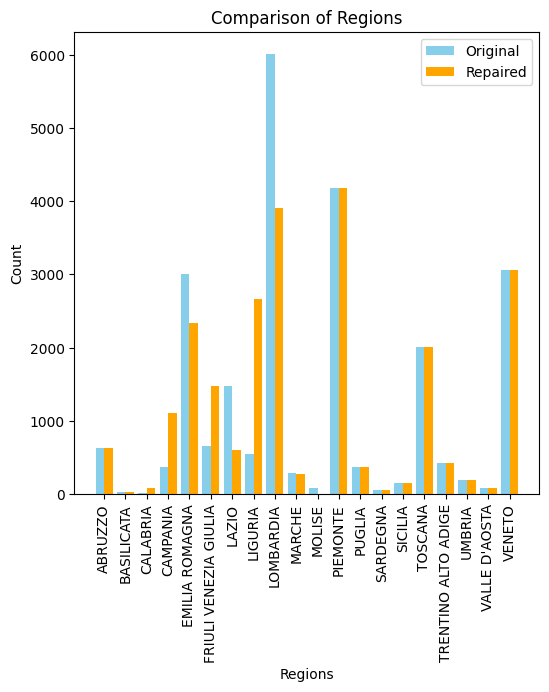

In [116]:
orig_counts = job_df_orig_location['cand_domicile_region_str'].value_counts()
repaired_counts = job_df_repaired_location['cand_domicile_region_str'].value_counts()

orig_counts,repaired_counts,all_index = f.prepare_different_series(orig_counts,repaired_counts)
f.compare_plot(orig_counts,repaired_counts,all_index,'Comparison of Regions','Regions')